In [1]:
from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt
import time
import os
import copy


import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.nn.functional as F

import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import Dataset, DataLoader

from PIL import Image

In [91]:
# class CustomDataset(Dataset):
#     def __init__(self, root_dir, transform=None):
#         """
#         Args:
#             root_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied on a sample.
#         """
#         self.root_dir = root_dir
#         self.transform = transform
#         self.image_files = [os.path.join(root_dir, f) for f in os.listdir(root_dir) if f.endswith(('.png'))]

#     def __len__(self):
#         return len(self.image_files)

#     def __getitem__(self, idx):
#         img_name = self.image_files[idx]
#         image = Image.open(img_name).convert('RGB')  # Ensure image is RGB
#         if self.transform:
#             image = self.transform(image)
#         return image

# # Path to your dataset directory
# dir_images = 'data/dataset/images'
# dir_labels = 'data/dataset/labels'

# # Usage
# dataset_images = CustomDataset(dir_images, transform=transforms.ToTensor())
# dataset_dots = CustomDataset(dir_labels, transform=transforms.ToTensor())

# dataloaders = {
#     'images': DataLoader(dataset_images, shuffle=False, batch_size=20),
#     'labels': DataLoader(dataset_dots, shuffle=False, batch_size=20)
#   }



In [ ]:
# class CustomDataset(Dataset):
#     def __init__(self, root_dir, img_fld, lbl_fld, transform=None):
#         """
#         Args:
#             root_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied on a sample.
#         """
#         self.root_dir = root_dir
#         self.transform = transform
#         for f in os.listdir(f'{root_dir}/{img_fld}'):
#             if f.endswith(('.png')):
#                 self.image_files = [os.path.join(f'{root_dir}/{img_fld}', f)]
#                 self.labels_files = [os.path.join(f'{root_dir}/{lbl_fld}', f.replace('cell', 'dots'))]

#     def __len__(self):
#         return len(self.image_files)

#     def __getitem__(self, idx):
#         img_name = self.image_files[idx]
#         image = Image.open(img_name).convert('RGB')  # Ensure image is RGB
#         if self.transform:
#             image = self.transform(image)
#         return image

# # Path to your dataset directory
# dir_images = 'data/dataset/images'
# dir_labels = 'data/dataset/labels'

# # Usage
# dataset_images = CustomDataset(dir_images, transform=transforms.ToTensor())
# dataset_dots = CustomDataset(dir_labels, transform=transforms.ToTensor())

# dataloaders = {
#     'images': DataLoader(dataset_images, shuffle=False, batch_size=10),
#     'labels': DataLoader(dataset_dots, shuffle=False, batch_size=10)
#   }



<class 'torch.utils.data.dataloader.DataLoader'>


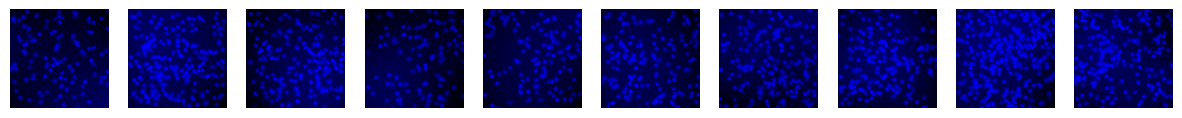

<class 'torch.utils.data.dataloader.DataLoader'>


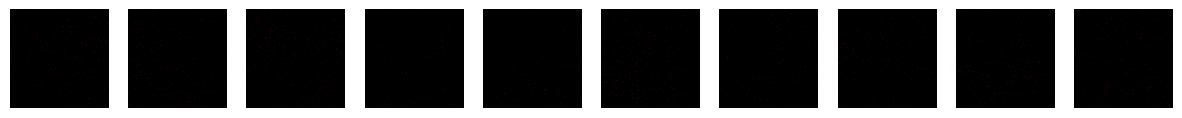

In [65]:

# # Display function to show images
# def show_images(dataloader, num_images=10):
#     # Get a batch of images
#     print(type(dataloader))
#     images = next(iter(dataloader))
    
#     # Create a grid of subplots
#     fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 5))
    
#     # Plot each image in the batch
#     for i, img in enumerate(images):
#         if i >= num_images:
#             break
#         ax = axes[i] if num_images > 1 else axes
#         img = img.numpy().transpose((1, 2, 0))  # Convert from Torch tensor to numpy and correct the channel order
#         ax.imshow(img)
#         ax.axis('off')
#     plt.show()

# show_images(dataloaders['images'])
# show_images(dataloaders['labels'])

In [8]:
# labels = next(iter(dataloaders['labels']))


In [7]:
# labels = next(iter(dataloaders['labels']))
# for i in range(len(labels)):
#     print(int(labels[i].sum()))

In [22]:
# create list for test and train datasets

num_l = []
for f in os.listdir('data/dataset/images'):
    num_l.append(f[:3])

test_fl = num_l[:int(len(num_l) * 0.2)]
train_fl = num_l[int(len(num_l) * 0.2):]

In [106]:
class CustomDataset(Dataset):
    def __init__(self, root_dir, data_folder, label_folder, num_files):
        """
        Args:
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        self.root_dir = root_dir
        self.data_folder = data_folder
        self.label_folder = label_folder
        self.data_dir = os.path.join(root_dir, data_folder)
        self.label_dir = os.path.join(root_dir, label_folder)
        self.transform = transforms.ToTensor()
        # print(num_files)
        # self.image_files = [os.path.join(self.data_dir, f) for f in os.listdir(self.data_dir) if (f.endswith(('.png')) and f[:3] in num_files)]
        self.image_files = []
        for f in os.listdir(self.data_dir):
            # print(f[:3])
            # print(f[:3] in num_files)
            if f.endswith(('.png')) and f[:3] in num_files:
                self.image_files.append(os.path.join(self.data_dir, f))
        # print(self.image_files)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        image = Image.open(img_name).convert('RGB')  # Ensure image is RGB
        image = self.transform(image)
        
        label_name = img_name.replace('cell', 'dots').replace(self.data_folder, self.label_folder)
        label_image = Image.open(label_name).convert('RGB')  # Ensure image is RGB
        label_image = self.transform(label_image)
        
        label = label_image.sum()
        return image, label


dir = 'data/dataset'
dataset_test = CustomDataset(dir, 'images', 'labels', test_fl)
dataloader_test = DataLoader(dataset_test, batch_size=12, shuffle=False)

dataset_train = CustomDataset(dir, 'images', 'labels', train_fl)
dataloader_train = DataLoader(dataset_train, batch_size=12, shuffle=False)

In [64]:
# class CustomDataset(Dataset):
#     def __init__(self, root_dir, data_folder, label_folder):
#         """
#         Args:
#             root_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied on a sample.
#         """
#         self.root_dir = root_dir
#         self.data_folder = data_folder
#         self.label_folder = label_folder
#         self.data_dir = os.path.join(root_dir, data_folder)
#         self.label_dir = os.path.join(root_dir, label_folder)
#         self.transform = transforms.ToTensor()
#         self.image_files = [os.path.join(self.data_dir, f) for f in os.listdir(self.data_dir) if f.endswith(('.png'))]

#     def __len__(self):
#         return len(self.image_files)

#     def __getitem__(self, idx):
#         img_name = self.image_files[idx]
#         image = Image.open(img_name).convert('RGB')  # Ensure image is RGB
#         image = self.transform(image)
        
#         label_name = img_name.replace('cell', 'dots').replace(self.data_folder, self.label_folder)
#         label_image = Image.open(label_name).convert('RGB')  # Ensure image is RGB
#         label_image = self.transform(label_image)
        
#         label = label_image.sum()
#         return image, label


# dir = 'data/dataset'
# dataset = CustomDataset(dir, 'images', 'labels')
# dataloader = DataLoader(dataset, batch_size=20, shuffle=False)

tensor([115., 235., 193., 116., 136., 168., 190., 192., 306., 223.,  81., 278.])


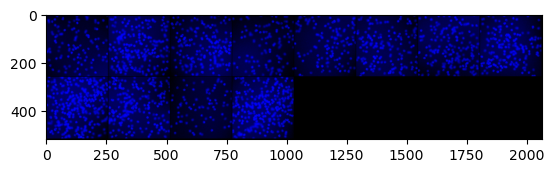

In [107]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# take a look at the test data

# Get a batch of training data
images, labels = next(iter(dataloader_test))

# Make a grid from batch
out = torchvision.utils.make_grid(images)

print(labels)
imshow(out)

tensor([102., 156., 220., 200., 197., 178.,  74., 206., 162., 199., 143., 314.])


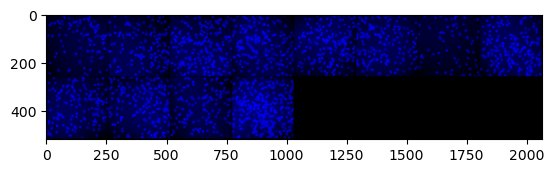

In [108]:
# take a look at the train data

# Get a batch of training data
images, labels = next(iter(dataloader_train))

# Make a grid from batch
out = torchvision.utils.make_grid(images)

print(labels)
imshow(out)

In [62]:
# images

In [166]:
class DotCounterNet(nn.Module):
    def __init__(self):
        super(DotCounterNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.dropout = nn.Dropout(0)

        self.fc1 = nn.Linear(32 * 29 * 29, 300)  
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 1)  

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))

        x = torch.flatten(x, 1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)  
        return x

net = DotCounterNet()


In [167]:
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
device

device(type='mps')

In [168]:
model = net.to(device)

In [169]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
num_epochs = 60

In [170]:
loss_l_tr, loss_l_val =[], []
l1_reg = [0, 1e-5]
l2_reg = [0, 0.001, 1e-5]

def train_model(model, dataloaders, criterion, optimizer, num_epochs, l1_strength, l2_strength): # , scheduler, num_epochs=25
    since = time.time()

    # Init variables that will save info about the best model
    best_model_wts = copy.deepcopy(model.state_dict())

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        running_loss = 0.0

        for phase in ['train', 'val']:
            if phase=='train':
                model.train()
                for inputs, labels in dataloaders[0]:
                    optimizer.zero_grad()
                    inputs=inputs.to(device)
                    labels = labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels.view(-1, 1))  
                    # L1 Regularization
                    if l1_strength > 0:
                        l1_reg_ = torch.tensor(0.).to(device)
                        for param in model.parameters():
                            l1_reg_ += torch.norm(param, 1)
                        loss += l1_strength * l1_reg_
                    # L2 Regularization
                    if l2_strength > 0:
                        l2_reg_ = torch.tensor(0.).to(device)
                        for param in model.parameters():
                            l2_reg_ += torch.norm(param, 2)**2
                        loss += l2_strength * l2_reg_
                    loss.backward()
                    optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                epoch_loss = running_loss / len(dataloader_train)
                loss_l_tr.append(epoch_loss)
                print(f'{phase} Epoch {epoch+1}, Loss: {loss.item()}')

            else:
                model.eval()
                for inputs, labels in dataloaders[1]:
                    optimizer.zero_grad()
                    inputs=inputs.to(device)
                    labels = labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels.view(-1, 1))  
                running_loss += loss.item() * inputs.size(0)
                epoch_loss = running_loss / len(dataloader_test)
                loss_l_val.append(epoch_loss)
                print(f'{phase} Epoch {epoch+1}, Loss: {loss.item()}')


    return model

model = train_model(model,
                    [dataloader_train, dataloader_test],
                       criterion,
                       optimizer,
                       num_epochs,
                       l1_reg[0],
                       l2_reg[1]
                       )

Epoch 0/59
----------
train Epoch 1, Loss: 12400.2919921875
val Epoch 1, Loss: 7878.30078125
Epoch 1/59
----------
train Epoch 2, Loss: 1326.0068359375
val Epoch 2, Loss: 1165.8173828125
Epoch 2/59
----------
train Epoch 3, Loss: 944.0357055664062
val Epoch 3, Loss: 785.1620483398438
Epoch 3/59
----------
train Epoch 4, Loss: 1107.4918212890625
val Epoch 4, Loss: 685.2997436523438
Epoch 4/59
----------
train Epoch 5, Loss: 1148.3668212890625
val Epoch 5, Loss: 572.4305419921875
Epoch 5/59
----------
train Epoch 6, Loss: 808.3692626953125
val Epoch 6, Loss: 404.11041259765625
Epoch 6/59
----------
train Epoch 7, Loss: 332.3743896484375
val Epoch 7, Loss: 529.7614135742188
Epoch 7/59
----------
train Epoch 8, Loss: 209.943603515625
val Epoch 8, Loss: 397.9666748046875
Epoch 8/59
----------
train Epoch 9, Loss: 96.22982025146484
val Epoch 9, Loss: 173.6009521484375
Epoch 9/59
----------
train Epoch 10, Loss: 28.19791603088379
val Epoch 10, Loss: 140.1929168701172
Epoch 10/59
----------
tr

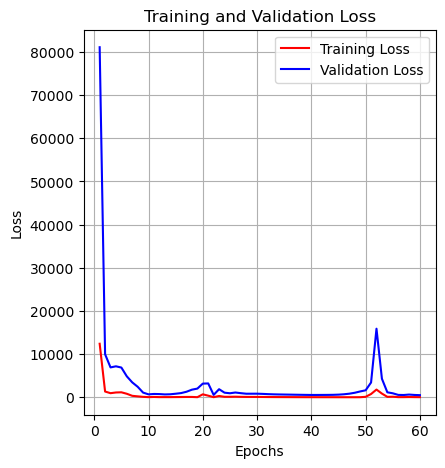

In [171]:
plt.figure(figsize=(10, 5))
epochs = range(1, num_epochs + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs, loss_l_tr, 'r', label='Training Loss')
plt.plot(epochs, loss_l_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.show();

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

num_epochs = 60
# Example training loop (simplified)
for epoch in range(num_epochs):
    for inputs, labels in dataloader_train:
        optimizer.zero_grad()
        inputs=inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))  # Ensure targets are correctly shaped
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}, Loss: {loss.item()}')
